![Logo de Naturgy](https://cdn.hellowatt.es/media/logos/Naturgy_logo.png)


# Análisis Exploratorio de Datos (EDA) y Modelado Predictivo para Naturgy: Impulsando el Futuro Energético

**Índice del Notebook**

*   [1 Exploración Inicial y Limpieza de Datos](#1-exploracion-inicial-y-limpieza-de-datos)
    *   [Librerías](#librerias)
*   [2 Carga y Análisis Individual de Datasets](#2-carga-y-analisis-individual-de-datasets)
    *   [Dataset de Energía Mix Energético Español](#dataset-de-energia-mix-energetico-espanol)
    *   [Dataset de Clima](#dataset-de-clima)
    *   [Conclusiones de este apartado:](#conclusiones-de-este-apartado)
*   [3 Unión y Creación del Dataset Base](#3-union-y-creacion-del-dataset-base)
    *   [PROBLEMA CON LA UNIDAD DEL VIENTO](#problema-con-la-unidad-del-viento)
*   [4 Análisis Exploratorio del Dataset Combinado](#4-analisis-exploratorio-del-dataset-combinado)
    *   [Distribución de Variables Numéricas (Univariante)](#distribucion-de-variables-numericas-univariante)
    *   [Análisis de las Variables Objetivo (Targets)](#analisis-de-las-variables-objetivo-targets)
    *   [Análisis de Outliers](#analisis-de-outliers)
    *   [Análisis de Correlaciones](#analisis-de-correlaciones)
        *   [Correlación entre Targets](#correlacion-entre-targets)
    *   [Series Temporales y Estacionalidad](#series-temporales-y-estacionalidad)
*   [5 Limpieza, Procesamiento y Feature Engineering](#5-limpieza-procesamiento-y-feature-engineering)
    *   [Tratamiento de outlayers (Extremos)](#tratamiento-de-outlayers-extremos)
    *   [Tranformaciones](#tranformaciones)
    *   [Análisis del Factor de Inflación de la Varianza (VIF)](#analisis-del-factor-de-inflacion-de-la-varianza-vif)
*   [6 Pipeline de Procesamiento de datos](#6-pipeline-de-procesamiento-de-datos)
*   [7 Preparación y Entrenamiento de modelos](#7-preparacion-y-entrenamiento-de-modelos)
    *   [XGBoost](#xgboost)
    *   [Red Neuronal](#red-neuronal)
    *   [Resultados](#resultados)
    *   [Conclusiones de los modelos](#conclusiones-de-los-modelos)


## 1 Exploración Inicial y Limpieza de Datos

### Librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (18, 8)

### Carga y Análisis Individual de Datasets

#### Dataset de Energía Mix Energético Español

In [ ]:
df_energy = pd.read_parquet('../data/energy_silver.parquet/')
print(f"Dataset de Energía cargado con dimensiones: {df_energy.shape}")

Dataset de Energía cargado con dimensiones: (35046, 29)


In [ ]:
display(df_energy.head())
display(df_energy.info())
display(df_energy.describe())

time  generation biomass  \
0 2015-02-26 13:00:00               472.0   
1 2015-04-30 07:00:00               382.0   
2 2015-06-13 20:00:00               486.0   
3 2015-06-23 19:00:00               496.0   
4 2015-06-30 23:00:00               497.0   

   generation fossil brown coal or lignite  \
0                                      0.0   
1                                    647.0   
2                                    980.0   
3                                    538.0   
4                                    936.0   

   generation fossil coal-derived gas  generation fossil gas  \
0                                 0.0                 3524.0   
1                                 0.0                 4907.0   
2                                 0.0                 4444.0   
3                                 0.0                 4818.0   
4                                 0.0                 5253.0   

   generation fossil hard coal  generation fossil oil  \
0                       2492.0                  361.0   
1                       6307.0                  363.0   
2                       6650.0                  249.0   
3                       7598.0                  369.0   
4                       6619.0                  274.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ... generation waste  generation wind offshore  generation wind onshore  \
0  ...            202.0                       0.0                  10524.0   
1  ...            185.0                       0.0                   4478.0   
2  ...            280.0                       0.0                   3743.0   
3  ...            268.0                       0.0                   5692.0   
4  ...            237.0                       0.0                   1971.0   

   forecast solar day ahead  forecast wind offshore eday ahead  \
0                    3599.0                            Unknown   
1                    2132.0                            Unknown   
2                     396.0                            Unknown   
3                    1082.0                            Unknown   
4                       2.0                            Unknown   

   forecast wind onshore day ahead  total load forecast  total load actual  \
0                          10387.0              33607.0            33320.0   
1                           4514.0              30485.0            30581.0   
2                           3981.0              27127.0            26635.0   
3                           5858.0              30816.0            29731.0   
4                           2174.0              22428.0            23341.0   

   price day ahead  price actual  
0            41.10         53.80  
1            59.99         71.36  
2            62.13         72.12  
3            62.21         75.64  
4            49.67         60.52  

[5 rows x 29 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35046 entries, 0 to 35045
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   time                                         35046 non-null  datetime64[ns]
 1   generation biomass                           35046 non-null  float64       
 2   generation fossil brown coal or lignite      35046 non-null  float64       
 3   generation fossil coal-derived gas           35046 non-null  float64       
 4   generation fossil gas                        35046 non-null  float64       
 5   generation fossil hard coal                  35046 non-null  float64       
 6   generation fossil oil                        35046 non-null  float64       
 7   generation fossil oil shale                  35046 non-null  float64       
 8   generation fossil peat                       35046 non-null  float64       


None

time  generation biomass  \
count                          35046        35046.000000   
mean   2016-12-31 17:28:37.822290688          383.513011   
min              2014-12-31 23:00:00            0.000000   
25%              2016-01-01 16:15:00          333.000000   
50%              2016-12-31 18:30:00          367.000000   
75%              2017-12-31 19:45:00          433.000000   
max              2018-12-31 22:00:00          592.000000   
std                              NaN           85.352783   

       generation fossil brown coal or lignite  \
count                             35046.000000   
mean                                448.059208   
min                                   0.000000   
25%                                   0.000000   
50%                                 509.000000   
75%                                 757.000000   
max                                 999.000000   
std                                 354.568590   

       generation fossil coal-derived gas  generation fossil gas  \
count                             35046.0           35046.000000   
mean                                  0.0            5622.737488   
min                                   0.0               0.000000   
25%                                   0.0            4126.000000   
50%                                   0.0            4969.000000   
75%                                   0.0            6429.000000   
max                                   0.0           20034.000000   
std                                   0.0            2201.830478   

       generation fossil hard coal  generation fossil oil  \
count                 35046.000000           35046.000000   
mean                   4256.065742             298.319808   
min                       0.000000               0.000000   
25%                    2527.000000             263.000000   
50%                    4474.000000             300.000000   
75%                    5838.750000             330.000000   
max                    8359.000000             449.000000   
std                    1961.601013              52.519923   

       generation fossil oil shale  generation fossil peat  \
count                      35046.0                 35046.0   
mean                           0.0                     0.0   
min                            0.0                     0.0   
25%                            0.0                     0.0   
50%                            0.0                     0.0   
75%                            0.0                     0.0   
max                            0.0                     0.0   
std                            0.0                     0.0   

       generation geothermal  ...  generation solar  generation waste  \
count                35046.0  ...      35046.000000      35046.000000   
mean                     0.0  ...       1432.665925        269.452377   
min                      0.0  ...          0.000000          0.000000   
25%                      0.0  ...         71.000000        240.000000   
50%                      0.0  ...        616.000000        279.000000   
75%                      0.0  ...       2578.000000        310.000000   
max                      0.0  ...       5792.000000        357.000000   
std                      0.0  ...       1680.119887         50.194840   

       generation wind offshore  generation wind onshore  \
count                   35046.0             35046.000000   
mean                        0.0              5464.479769   
min                         0.0                 0.000000   
25%                         0.0              2933.000000   
50%                         0.0              4849.000000   
75%                         0.0              7398.000000   
max                         0.0             17436.000000   
std                         0.0              3213.691587   

       forecast solar day ahead  forecast wind onshore day ahead  \
count              35046.000000                    

**Observaciones**: Las fuentes renovables son las que más variabilidad tiene.

Por otra parte hay fuentes que no tienen variabilidad lo que posiblemente pueden eliminarse.

Hay dos columnas de tipo object, teniendo en cuenta que es una tabla de mediciones probablemene se puedan eliminar o estén etiquetas por algo durante el proceso de ETL en la capa bronze.

#### Dataset de Clima

In [ ]:
df_weather = pd.read_parquet('../data/weather_features_silver.parquet')
print(f"Dataset de Clima cargado con dimensiones: {df_weather.shape}")

Dataset de Clima cargado con dimensiones: (175271, 15)


In [ ]:
display(df_weather.head())
display(df_weather.info())
display(df_weather.describe())

time   city_name    temp  temp_min  temp_max  pressure  \
0 2015-01-16 04:00:00    Valencia  12.100    12.100    12.100      1009   
1 2015-01-26 20:00:00    Valencia   3.748     3.748     3.748      1027   
2 2015-02-24 20:00:00     Seville   9.962     9.962     9.962      1039   
3 2015-03-01 00:00:00      Madrid  14.800    14.800    14.800       942   
4 2015-03-01 19:00:00   Barcelona  16.600    16.600    16.600      1015   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0        61        21.6       242      0.0      0.0      0.0          76   
1        77         3.6        46      0.0      0.0      0.0          36   
2        62        14.4       349      0.0      0.0      0.0           0   
3        89         7.2       252      0.0      0.0      0.0           8   
4        90         7.2       225      0.0      0.0      0.0           0   

  weather_main weather_description  
0       clouds       broken clouds  
1       clouds    scattered clouds  
2        clear        sky is clear  
3        clear        sky is clear  
4        clear        sky is clear

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175271 entries, 0 to 175270
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   time                 175271 non-null  datetime64[ns]
 1   city_name            175271 non-null  object        
 2   temp                 175271 non-null  float64       
 3   temp_min             175271 non-null  float64       
 4   temp_max             175271 non-null  float64       
 5   pressure             175271 non-null  int32         
 6   humidity             175271 non-null  int32         
 7   wind_speed           175271 non-null  float64       
 8   wind_deg             175271 non-null  int32         
 9   rain_1h              175271 non-null  float64       
 10  rain_3h              175271 non-null  float64       
 11  snow_3h              175271 non-null  float64       
 12  clouds_all           175271 non-null  int32         
 13  weather_main  

None

time           temp       temp_min  \
count                         175271  175271.000000  175271.000000   
mean   2016-12-31 14:55:28.938614784      16.559508      15.279950   
min              2014-12-31 23:00:00     -10.910000     -10.910000   
25%              2016-01-01 12:00:00      10.681000       9.639750   
50%              2016-12-31 15:00:00      16.000000      15.000000   
75%              2017-12-31 19:00:00      22.090000      21.000000   
max              2018-12-31 22:00:00      42.450000      42.000000   
std                              NaN       8.024963       7.948565   

            temp_max       pressure       humidity     wind_speed  \
count  175271.000000  175271.000000  175271.000000  175271.000000   
mean       18.024507    1016.215871      68.050339       8.889137   
min       -10.910000     918.000000       0.000000       0.000000   
25%        11.777594    1013.000000      53.000000       3.600000   
50%        17.000000    1018.000000      72.000000       7.200000   
75%        24.000000    1022.000000      87.000000      14.400000   
max        48.000000    1090.000000     100.000000     230.400000   
std         8.613761      12.499474      21.813633       7.457877   

            wind_deg        rain_1h        rain_3h        snow_3h  \
count  175271.000000  175271.000000  175271.000000  175271.000000   
mean      166.727097       0.068966       0.000386       0.004848   
min         0.000000       0.000000       0.000000       0.000000   
25%        56.000000       0.000000       0.000000       0.000000   
50%       178.000000       0.000000       0.000000       0.000000   
75%       270.000000       0.000000       0.000000       0.000000   
max       360.000000      12.000000       2.315000      21.500000   
std       116.543511       0.380658       0.007349       0.224579   

          clouds_all  
count  175271.000000  
mean       24.343052  
min         0.000000  
25%         0.000000  
50%        16.000000  
75%        40.000000  
max       100.000000  
std        30.338188

**Observaciones**: Podemos observar que hay datos con muy poca variabilidad sobretedo en rain y snow. Tal vez la mejor opción sea dejar solo el que sea más predictor para nuestros targets.

Por otra parte hay que comprobar las columnas temp ya que me da la sensación de que no varían tanto debido a que es por horas, entonces temp max y min pueden no ser relevantes.


### Conclusiones de este apartado:
Hay varia columnas que son interesantes como target: total load actual (la demanada real de energía), price actual (El precio real).

Lo ideal sería la predicción de estas variables de cara al futuro, pero debido a su propia naturaleza, es una tarea muy complicada de realizar con los datasets que tenemos. Sin embargo una predicción en tiempo real puede ser útil.

- **total load actual:** Una detección ultra-rapida de anomalías podría permitir a los operadores de las centrales tomar medidas correctivas antes de que el dato oficial consolidado confirme el problema.

- **price actual:** Al igual que la bolsa de valores, el precio de la electricidad fluue de forma constate, el problema es que al igual que la bolsa, siempre hay un tiempo de retraso a la hora de ver su valor. Industrias grande podrían beneficiarse de esta ventaja.

Finalmente me parece interesante crear una columna nueva que junte la generación de todas las renovables podría ser algo como:

- **total renewable generation**: Se podría usar para detectar anomalías, como fenómenos atmosféricos que a lo mejor no estaban previstos, si por ejemplo un frente de nubes avanzase más rápido se podría activar sistemas de respaldo como baterías o ciclos combinados para garatizar la estabilidad del Mix energético.


## 3. Unión y Creación del Dataset Base

Como el dataset de energy es a nivel nacional, intentaremos hacer la media de de las condiciones del clima, que es por ciudad. Aunque perdamos algo de información, al calcular a nivel nacional no nos afectará tanto.



### **PROBLEMA CON LA UNIDAD DEL VIENTO**
La naturaleza del viento es vectorial por lo que intar sumarlas como si fuesen escalares sería incorrecto y no representaría el Mundo real.

<div align="center">
    <img src="https://silviaalonsoperez.com/wp-content/uploads/2014/06/zonal_y_meridional1.jpg" alt="Dirección y velocidad del viento con componentes meridional y zonal" width="600"/>
</div>


In [ ]:
numeric_cols_weather = numeric_cols_weather = df_weather.select_dtypes(include=np.number).columns

# COnversión a componentes vectoriales del viento
df_weather['wind_x'] = df_weather['wind_speed'] * np.cos(np.radians((90 - df_weather['wind_deg']) % 360))
df_weather['wind_y'] = df_weather['wind_speed'] * np.sin(np.radians((90 - df_weather['wind_deg']) % 360))

# Agregar por tiempo (promediando las componentes vectoriales)
agg_dict = {col: 'mean' for col in numeric_cols_weather}
agg_dict['wind_x'] = 'mean'
agg_dict['wind_y'] = 'mean'
df_weather_agg = df_weather.groupby('time').agg(agg_dict).reset_index()

In [ ]:
df_weather.describe()

time           temp       temp_min  \
count                         175271  175271.000000  175271.000000   
mean   2016-12-31 14:55:28.938614784      16.559508      15.279950   
min              2014-12-31 23:00:00     -10.910000     -10.910000   
25%              2016-01-01 12:00:00      10.681000       9.639750   
50%              2016-12-31 15:00:00      16.000000      15.000000   
75%              2017-12-31 19:00:00      22.090000      21.000000   
max              2018-12-31 22:00:00      42.450000      42.000000   
std                              NaN       8.024963       7.948565   

            temp_max       pressure       humidity     wind_speed  \
count  175271.000000  175271.000000  175271.000000  175271.000000   
mean       18.024507    1016.215871      68.050339       8.889137   
min       -10.910000     918.000000       0.000000       0.000000   
25%        11.777594    1013.000000      53.000000       3.600000   
50%        17.000000    1018.000000      72.000000       7.200000   
75%        24.000000    1022.000000      87.000000      14.400000   
max        48.000000    1090.000000     100.000000     230.400000   
std         8.613761      12.499474      21.813633       7.457877   

            wind_deg        rain_1h        rain_3h        snow_3h  \
count  175271.000000  175271.000000  175271.000000  175271.000000   
mean      166.727097       0.068966       0.000386       0.004848   
min         0.000000       0.000000       0.000000       0.000000   
25%        56.000000       0.000000       0.000000       0.000000   
50%       178.000000       0.000000       0.000000       0.000000   
75%       270.000000       0.000000       0.000000       0.000000   
max       360.000000      12.000000       2.315000      21.500000   
std       116.543511       0.380658       0.007349       0.224579   

          clouds_all         wind_x         wind_y  
count  175271.000000  175271.000000  175271.000000  
mean       24.343052      -1.377273       0.139367  
min         0.000000    -192.508113     -63.125445  
25%         0.000000      -5.515520      -3.573166  
50%        16.000000       0.000000       0.000000  
75%        40.000000       2.757760       3.600000  
max       100.000000      58.204659     160.049289  
std        30.338188       8.675849       7.579610

In [ ]:
numeric_cols_weather = df_weather.select_dtypes(include=np.number).columns
agg_dict = {col: 'mean' for col in numeric_cols_weather}
df_weather_agg = df_weather.groupby('time').agg(agg_dict).reset_index()
df_merged = pd.merge(df_energy, df_weather_agg, on='time', how='inner')

# Columnas que tienen un único valor constante
cols_to_drop = [col for col in df_merged.columns if df_merged[col].nunique() == 1]
df_merged = df_merged.drop(columns=cols_to_drop, errors='ignore')

# Columnas de energías renovables
renewable_cols = [
    'generation biomass', 'generation hydro run-of-river and poundage',
    'generation hydro water reservoir', 'generation other renewable',
    'generation solar', 'generation waste', 'generation wind onshore'
]
df_merged['total_renewable_generation'] = df_merged[[col for col in renewable_cols if col in df_merged.columns]].sum(axis=1)

df_merged = df_merged.set_index('time')

print(f"Columnas eliminadas: {cols_to_drop}")
print(f"Dataset unido y limpio. Dimensiones: {df_merged.shape}")

Columnas eliminadas: ['generation fossil coal-derived gas', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation hydro pumped storage aggregated', 'generation marine', 'generation wind offshore', 'forecast wind offshore eday ahead']
Dataset unido y limpio. Dimensiones: (35046, 34)


**observaciones**: Confirmamos lo que sospechábamos de algunas conlumnas con datos continuos.

El dataset tiene predicciones del TSO de algunas variables claves. Las eliminaré.

In [ ]:
tso_cols_to_drop = ['price day ahead', 'forecast wind onshore ahead']
df_cleaned = df_merged.drop(columns=tso_cols_to_drop, errors='ignore')

## 4. Análisis Exploratorio del Dataset Combinado

### Distribución de Variables Numéricas (Univariante)

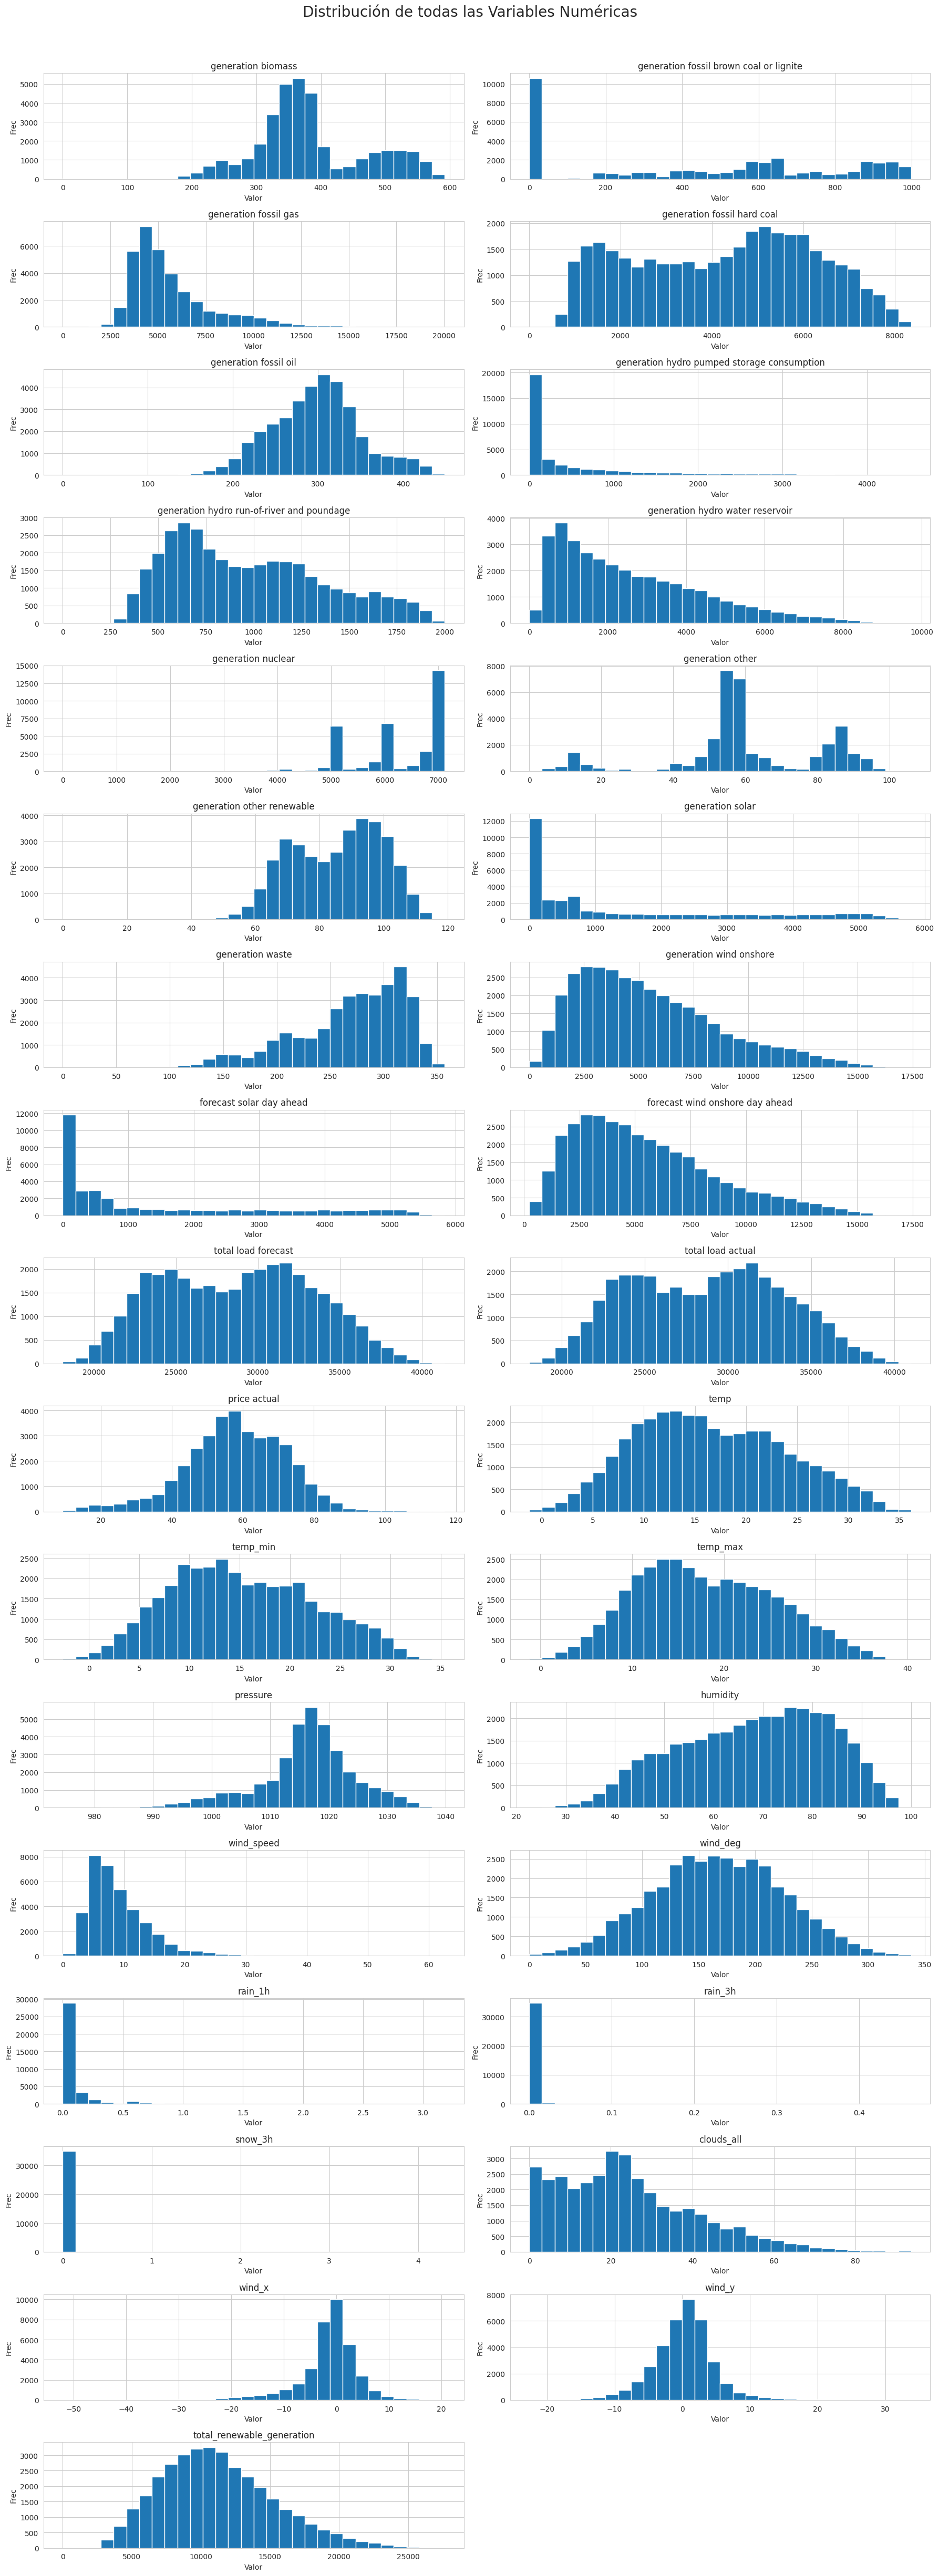

In [ ]:
axes = df_cleaned.select_dtypes(include=np.number).hist(bins=30, figsize=(18, 50), layout=(-1, 2))
plt.suptitle('Distribución de todas las Variables Numéricas', size=20)

for ax in axes.flatten():
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frec') 

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

**Observaciones**: hay bastante variedad en las distribuciones:
- Distribuciones con cola a la derecha: una gran parte de las variables muestran este patrón. Podría indicar valores extremos que tendríamos que tratar.
- Distribuciones normales: algunas variables presentan patrones más estables como la temperatura o el precio.
- Distribuciones bimodales/multimodales: podrían indicar patrones en el sistema energético.
- Distribuciones casi en 0: podrían tener muy poca relevancia para predicciones.

### Análisis de las Variables Objetivo (Targets)

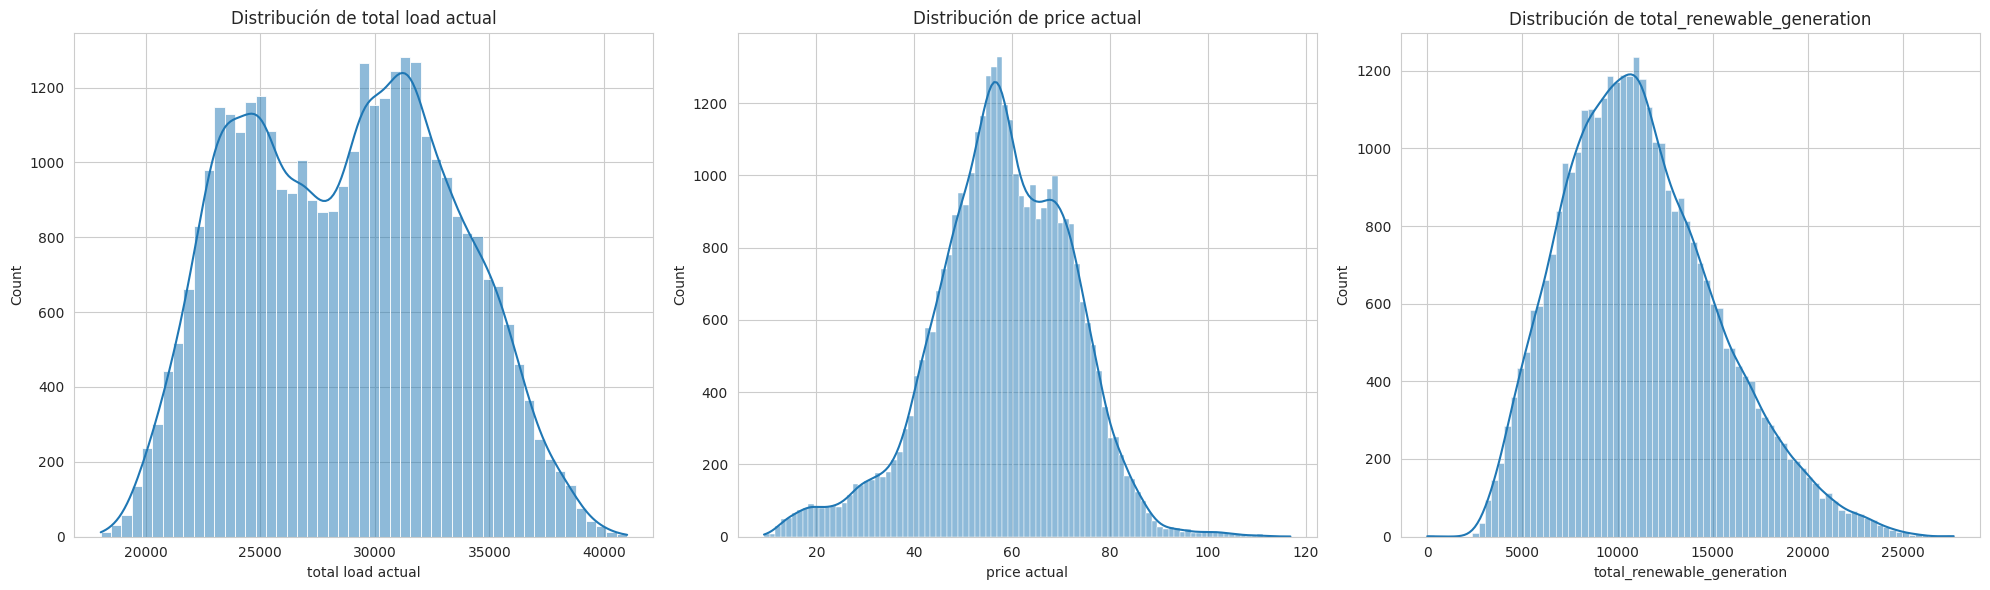

In [ ]:
targets_1 = ['total load actual', 'price actual', 'total_renewable_generation']
fig, axes = plt.subplots(1, len(targets_1), figsize=(20, 6))
for i, target in enumerate(targets_1):
    sns.histplot(df_cleaned[target], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {target}')
plt.tight_layout()
plt.show()

**Observaciones**
- total load actual: se aprecia claramente una distribución bimodal, podría ser por las diferenctes estaciones.
Podría ser interesante hacer una variable categórica que capture los patrones de consumo.
- price actual: tiene una distribución asimétrica positiva con una ligera bimodalidad, podría estar relacionado con la distribución de la generación total. De todas formas tal vez se podría aplicar algún tipo de transformación, eliminar los valores extremos .
- total_renewable_generation: distribución asimétrica pero casi hace una campana de Gauss.



### Análisis de Outliers

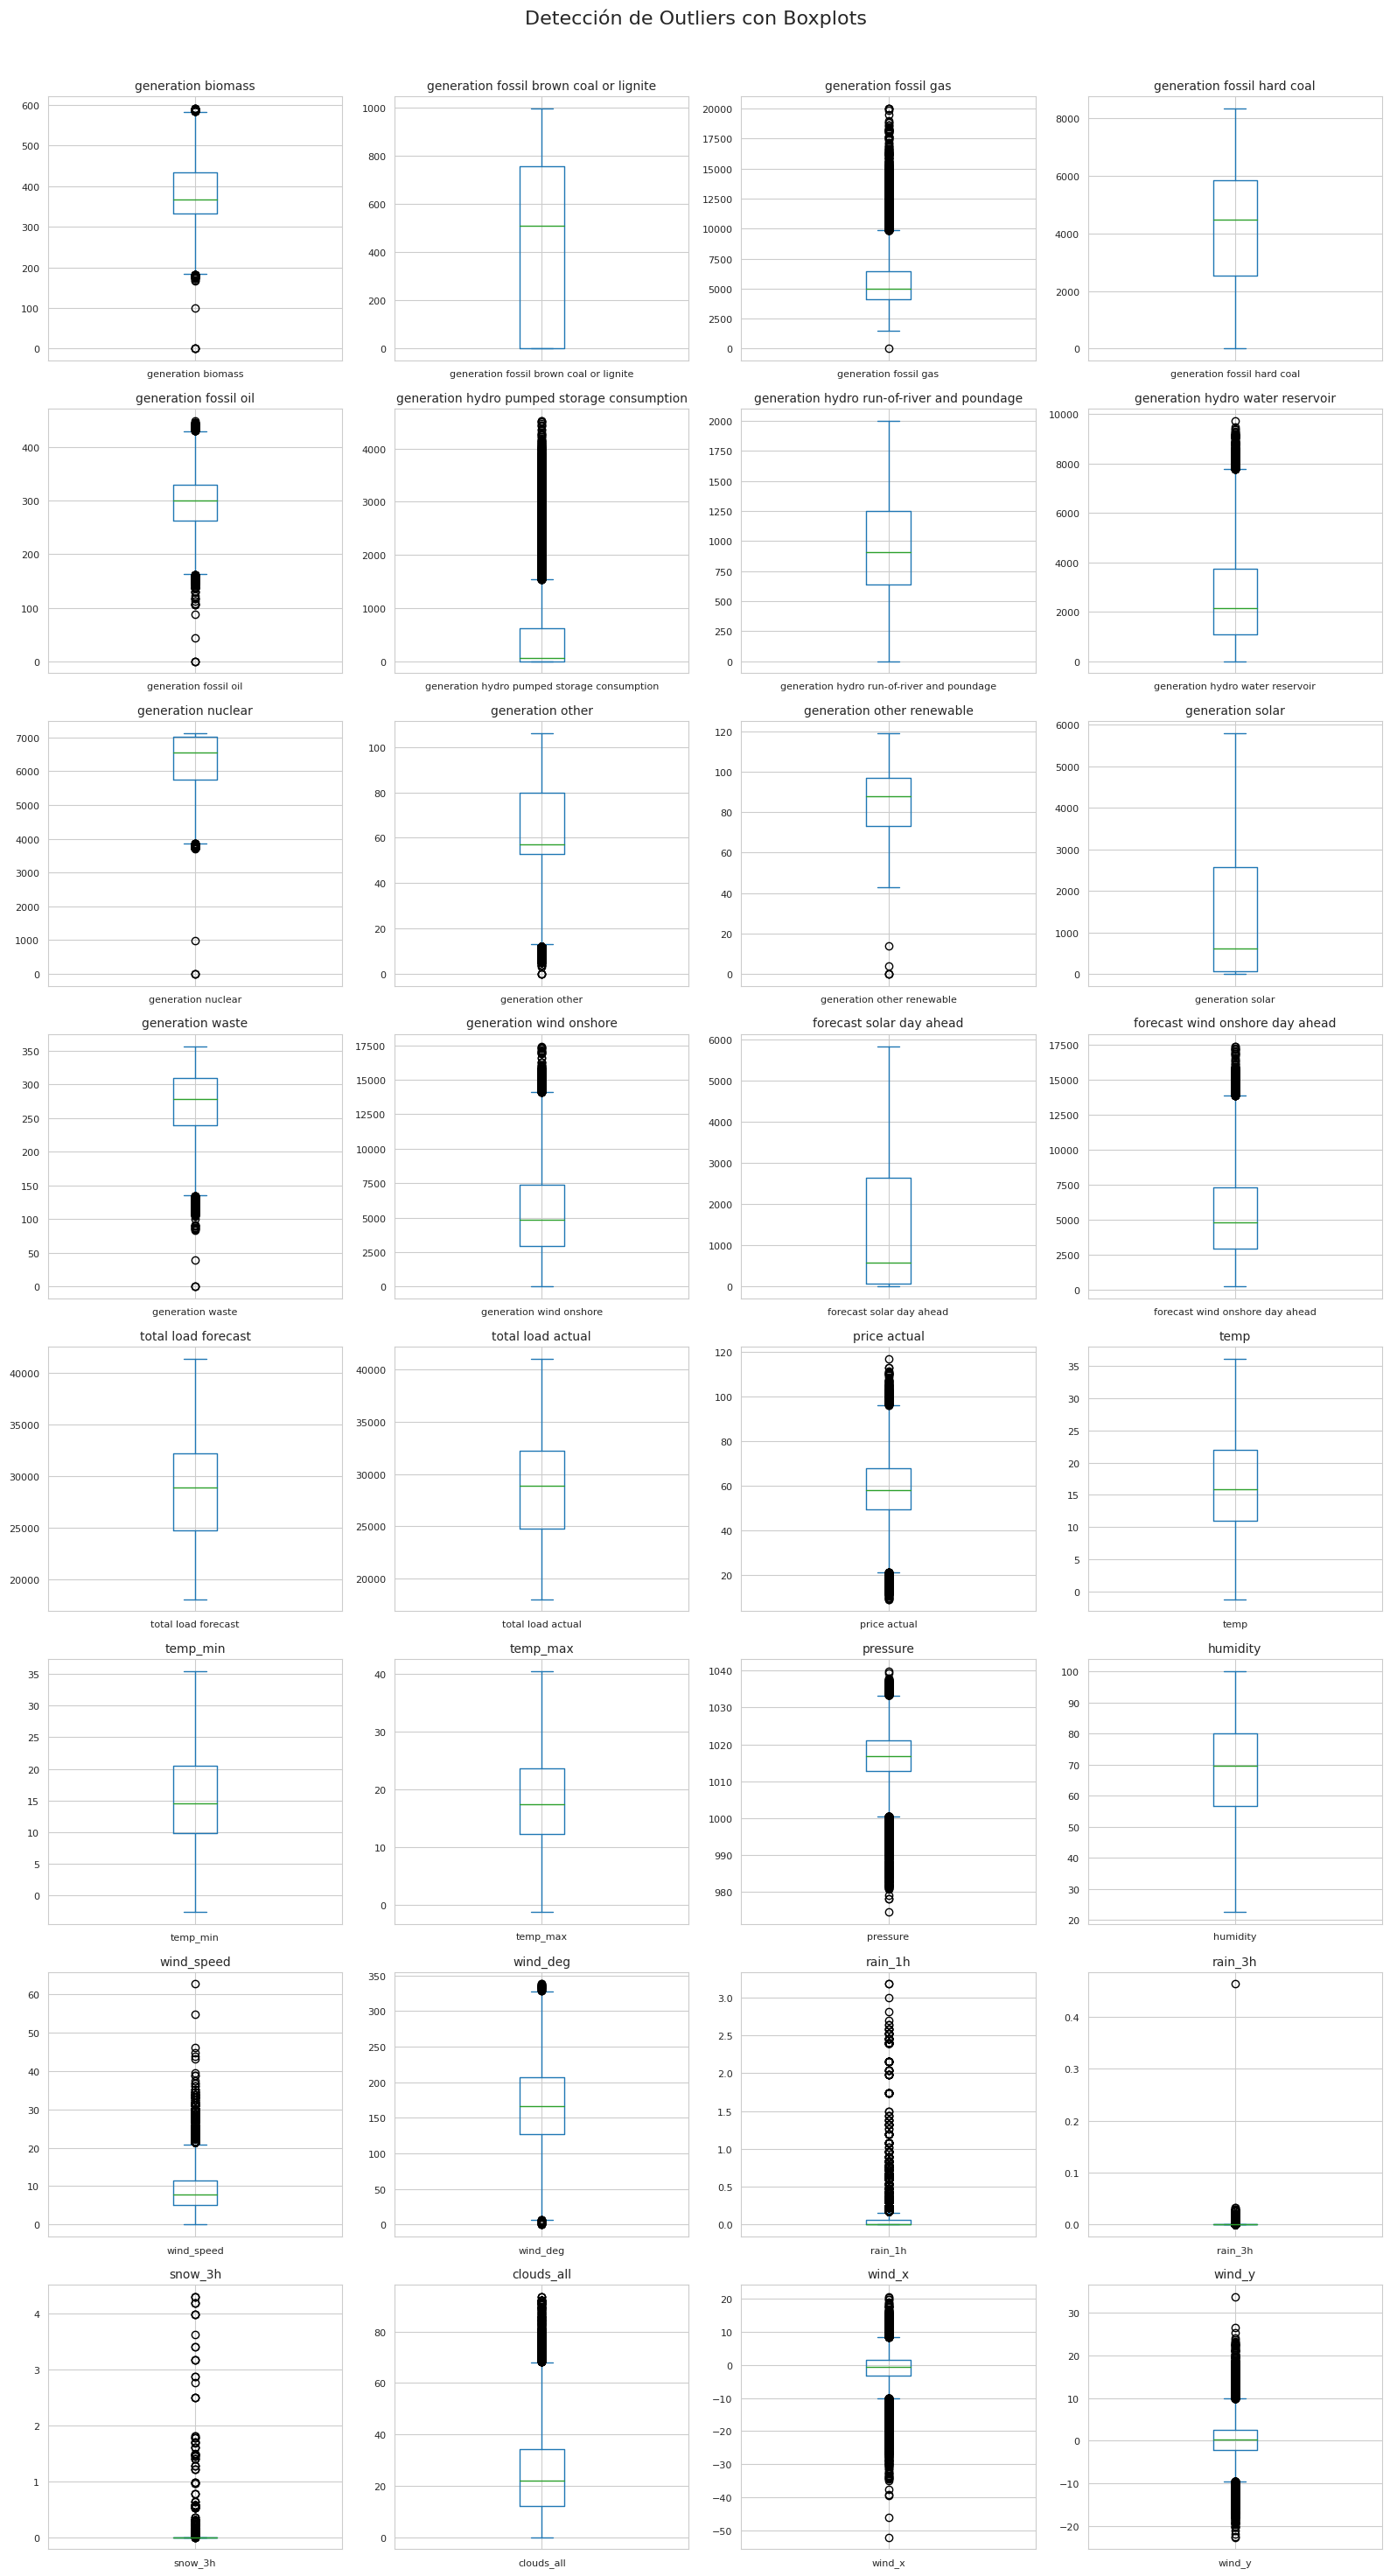

In [ ]:
num_cols = df_cleaned.select_dtypes(include=np.number).columns

fig, axes = plt.subplots(8, 4, figsize=(16, 30))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    if i < len(axes):
        df_cleaned[col].plot(kind='box', ax=axes[i])
        axes[i].set_title(col, fontsize=10)
        axes[i].tick_params(axis='both', labelsize=8)
        axes[i].set_xlabel('')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Detección de Outliers con Boxplots', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

**Observaciones**: A pesar de que se aprecian numerosos outlayers estos pueden guardan información bastante relevante, como fenómenos atmosféricos extremos. Podría ser interesante tratar solo aqullos que puedan sesgar el modelo.

###  Análisis de Correlaciones

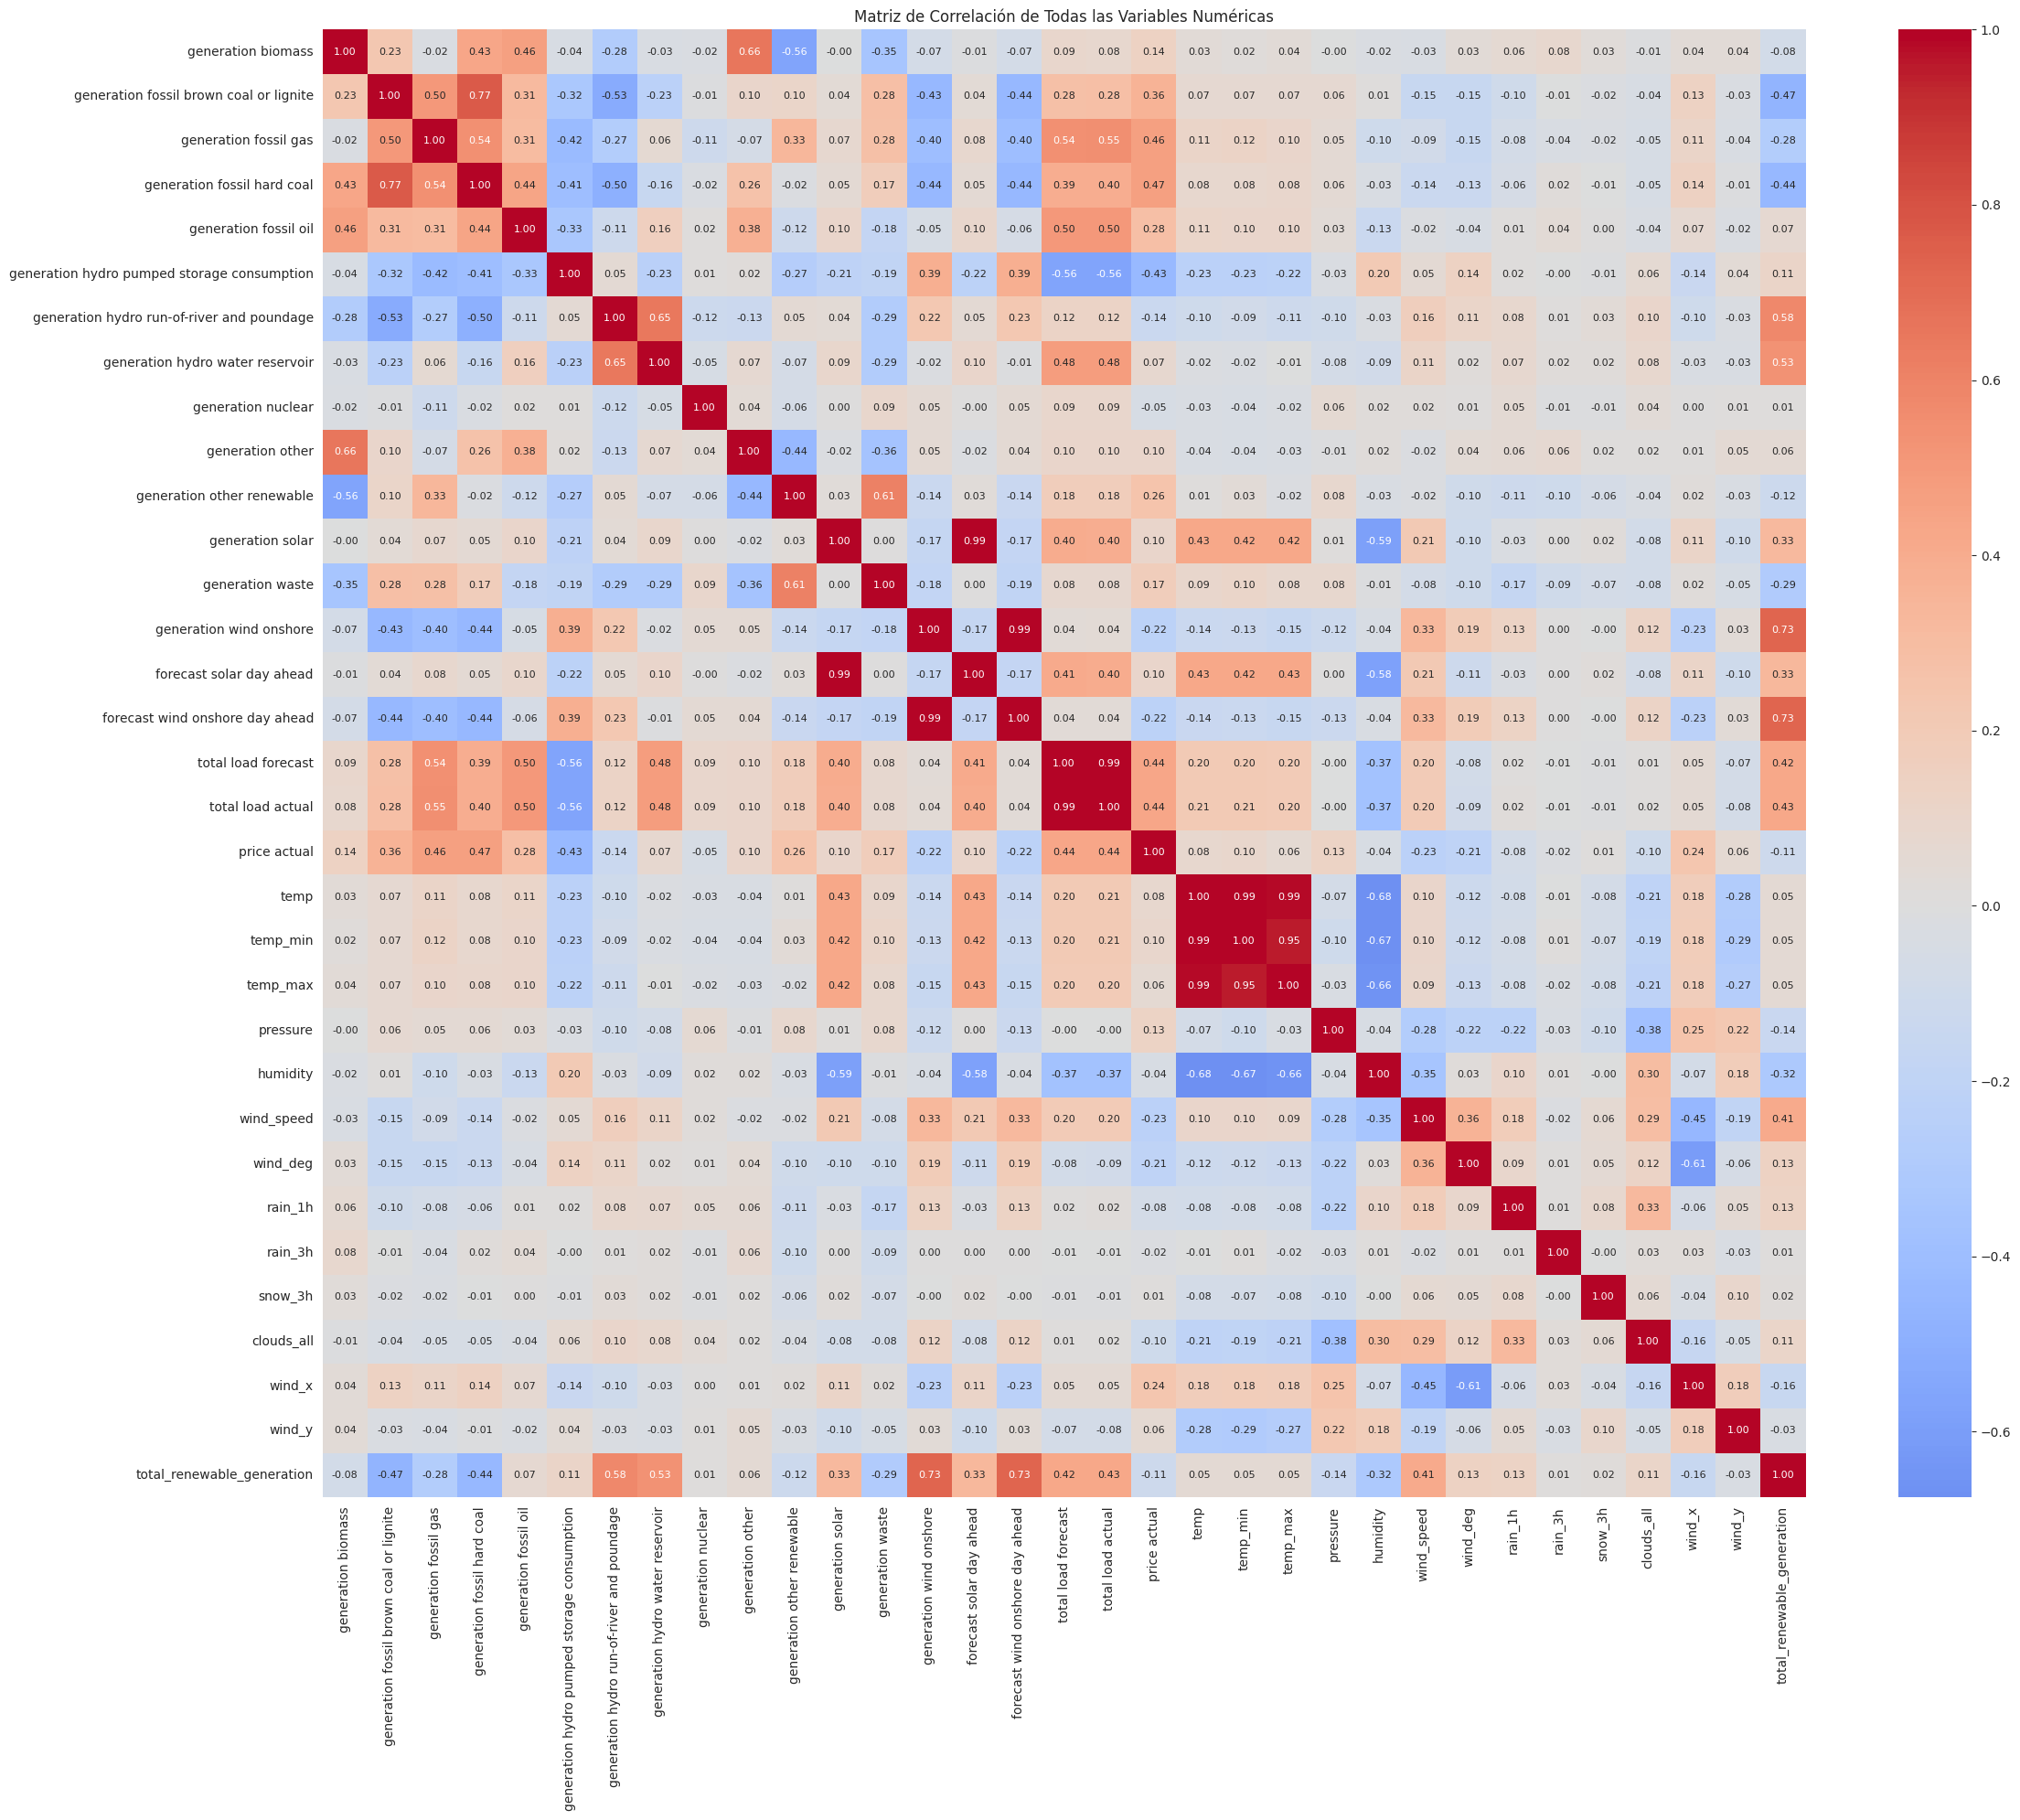

In [ ]:
corr_matrix = df_cleaned.select_dtypes(include=np.number).corr()

plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', annot_kws={"size": 8})
plt.title('Matriz de Correlación de Todas las Variables Numéricas')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Observaciones** : Es una tabla con bastantes dimensiones, no obstante probablemente se eliminen variables que no apartan nada y puede añadir ruido.
- Correlación entre fuentes fósiles: nos indica que suben y bajan de forma similar.
- Las condiciones meteorológicos parecen factores determinantes para calcular la genereación de las renovables.
- Las temperaturas entre ellas están demasiado correlacionadas (colinealidad).
- La generación nuclear no parece ser un predictor interesante.


#### Correlación entre Targets
Analizamos específicamente la relación entre nuestras variables objetivo. Esto es clave para un modelo multi-target, ya que una alta correlación puede indicar que los modelos pueden aprender patrones compartidos.

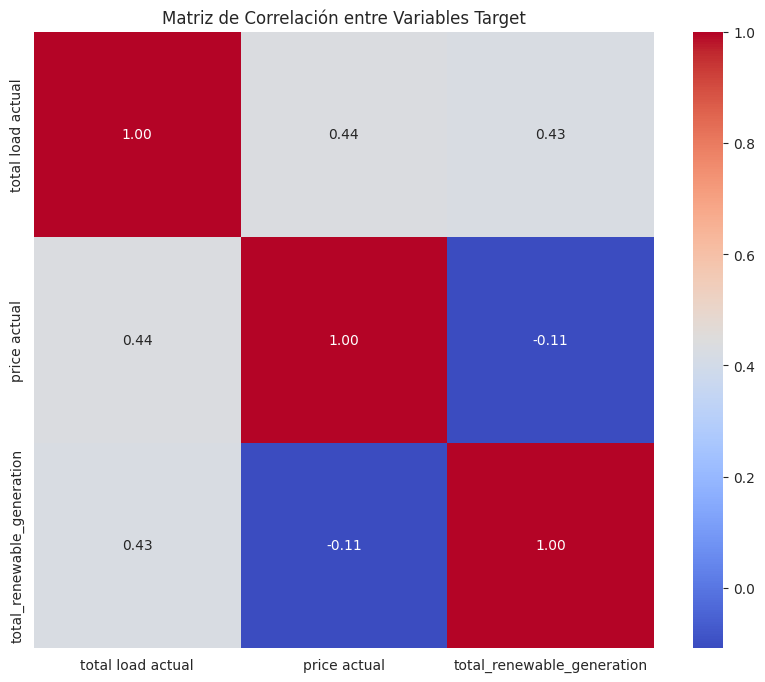

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned[targets_1].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables Target')
plt.show()


###  Series Temporales y Estacionalidad

Creo que sería interesante añadir columnas basadas en la fecha y hora, ya que supongo que los modelos que hagamos no podrán usar la variable time en ningún caso.
De esta forma el modelo podría beneficiarse de patrones que pueda proporcionar las fechas.

## 5 Limpieza, Procesamiento y Feature Engineering

### Tratamiento de outlayers (Extremos)

In [ ]:
columns_to_cap = [
    'price actual', 'generation fossil gas', 'generation fossil oil',
    'generation biomass', 'pressure', 'wind_speed', 'wind_x', 'wind_y'
]

df_processed = df_cleaned.copy()

for col in columns_to_cap:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_processed[col] = np.clip(df_processed[col], lower, upper)

### Tranformaciones

--- Aplicando Transformaciones Logarítmicas ---
Columna 'generation fossil oil' transformada con log1p.
Columna 'generation hydro pumped storage consumption' transformada con log1p.
Columna 'generation fossil gas' transformada con log.
Columna 'generation hydro water reservoir' transformada con log.
Columna 'price actual' transformada con log.
Columna 'wind_speed' transformada con log.
Columna 'clouds_all' transformada con log.

--- Proceso de Transformación Finalizado ---


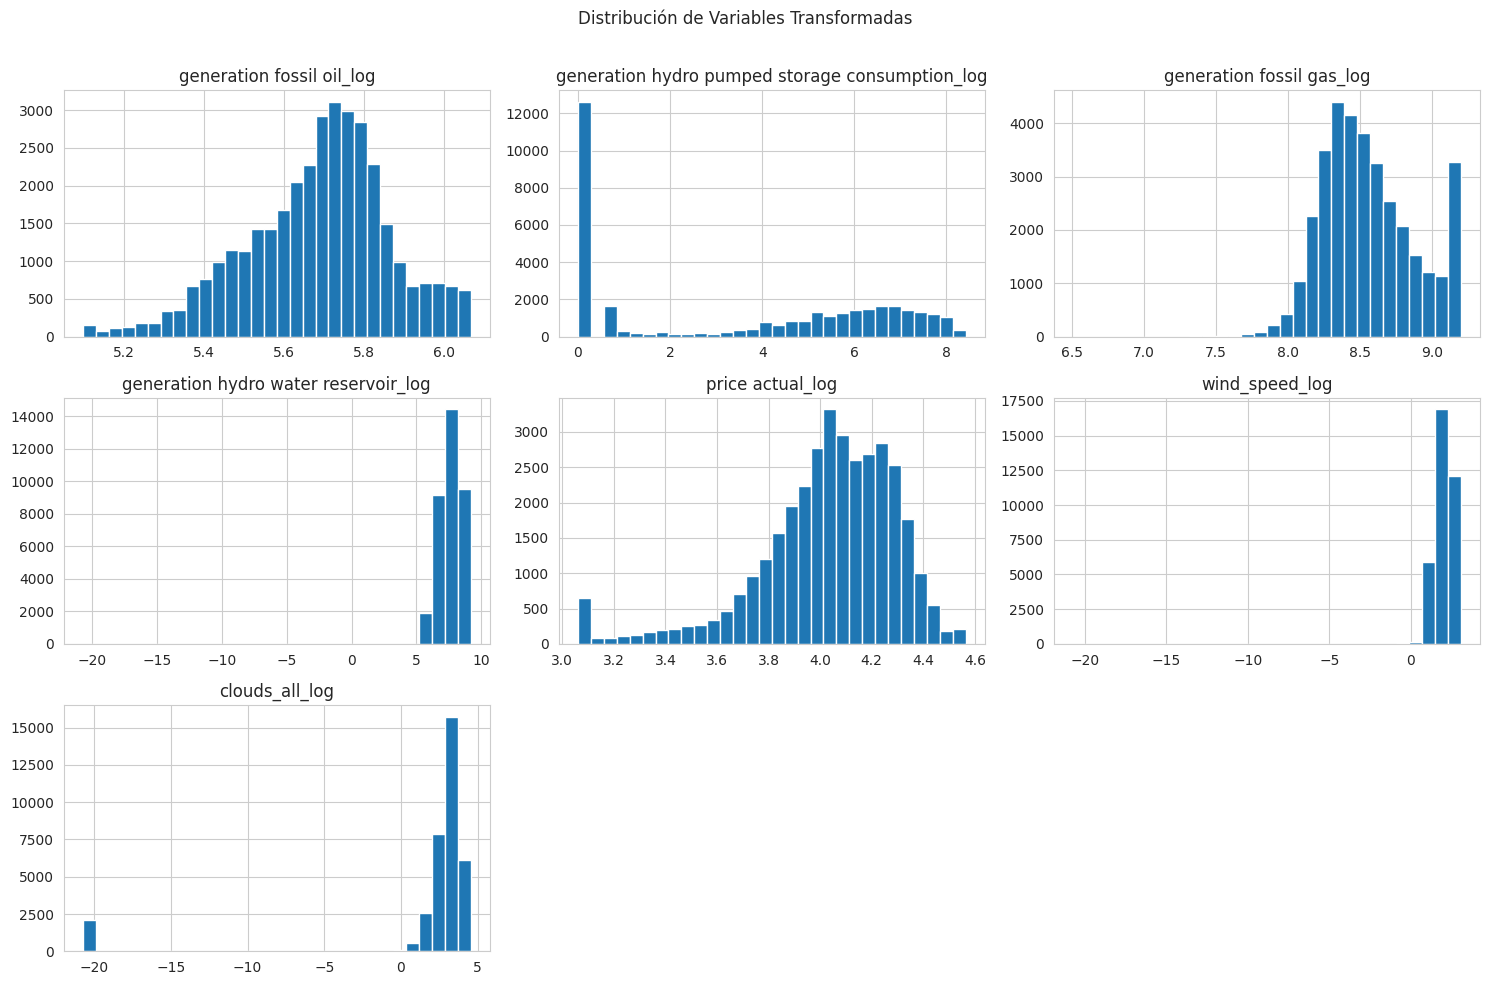

In [ ]:
import numpy as np

df_transformed = df_processed.copy()

cols_to_log1p = [
    'generation fossil oil',
    'generation hydro pumped storage consumption',
]

cols_to_log = [
    'generation fossil gas',
    'generation hydro water reservoir',
    'price actual',
    'wind_speed',
    'clouds_all'
]

print("--- Aplicando Transformaciones Logarítmicas ---")

for col in cols_to_log1p:
    if col in df_transformed.columns:
        df_transformed[col] = np.log1p(df_transformed[col])
        df_transformed.rename(columns={col: f'{col}_log'}, inplace=True)
        print(f"Columna '{col}' transformada con log1p.")

epsilon = 1e-9
for col in cols_to_log:
    if col in df_transformed.columns:
        df_transformed[col] = np.log(df_transformed[col] + epsilon)
        df_transformed.rename(columns={col: f'{col}_log'}, inplace=True)
        print(f"Columna '{col}' transformada con log.")

print("\n--- Proceso de Transformación Finalizado ---")

df_transformed[[f'{c}_log' for c in cols_to_log1p + cols_to_log]].hist(bins=30, figsize=(15, 10), layout=(-1, 3))
plt.suptitle('Distribución de Variables Transformadas')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [ ]:
df_transformed['hour'] = df_transformed.index.hour
df_transformed['dayofweek'] = df_transformed.index.dayofweek
df_transformed['month'] = df_transformed.index.month
df_transformed['year'] = df_transformed.index.year
df_transformed['dayofyear'] = df_transformed.index.dayofyear

df_transformed['hour_sin'] = np.sin(2 * np.pi * df_transformed['hour']/24.0)
df_transformed['hour_cos'] = np.cos(2 * np.pi * df_transformed['hour']/24.0)
df_transformed['dayofweek_sin'] = np.sin(2 * np.pi * df_transformed['dayofweek']/7.0)
df_transformed['dayofweek_cos'] = np.cos(2 * np.pi * df_transformed['dayofweek']/7.0)

print("Nuevas features temporales creadas.")

Nuevas features temporales creadas.


### Análisis del Factor de Inflación de la Varianza (VIF)
El VIF es una medida numérica para la multicolinealidad. Un valor de VIF > 10 es una señal fuerte de que una variable es redundante y podría ser eliminada. Esto ayuda a crear modelos más simples y estables.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df_numeric):
    vif_data = pd.DataFrame()
    vif_data['feature'] = df_numeric.columns
    vif_data['VIF'] = [variance_inflation_factor(df_numeric.values, i) for i in range(len(df_numeric.columns))]
    return vif_data.sort_values(by='VIF', ascending=False)

numeric_df = df_transformed.select_dtypes(include=np.number).dropna()
vif_results = calculate_vif(numeric_df)

print("Resultados del VIF (Factor de Inflación de la Varianza):")
display(vif_results.head(20))

Resultados del VIF (Factor de Inflación de la Varianza):


feature           VIF
36                                  year  32583.149333
22                              pressure  26433.427457
19                                  temp   7907.098547
17                     total load actual   4369.984076
16                   total load forecast   3985.696628
2              generation fossil gas_log   3183.571017
4              generation fossil oil_log   2133.270948
21                              temp_max   2129.728456
20                              temp_min   2018.905582
35                                 month    689.759918
37                             dayofyear    607.347512
7   generation hydro water reservoir_log    437.252304
18                      price actual_log    434.984827
13               generation wind onshore    396.364303
15       forecast wind onshore day ahead    375.645233
32            total_renewable_generation    315.841279
14              forecast solar day ahead    150.546887
11                      generation solar    144.227845
10            generation other renewable    116.100031
23                              humidity     85.570832

Para producción se podría plantear alguna lógica a la hora de elimnar estas columnas

In [ ]:
cols_to_drop_vif = [
    'generation biomass', 'generation hydro run-of-river and poundage',
    'generation hydro water reservoir', 'generation other renewable',
    'generation solar', 'generation waste', 'generation wind onshore',
    'temp_min', 'temp_max',
    'year', 'month', 'dayofyear', 'hour', 'dayofweek'
]

df_vif_cleaned = df_transformed.drop(columns=cols_to_drop_vif, errors='ignore')
print(f"Dimensiones tras eliminar variables con alto VIF: {df_vif_cleaned.shape}")
df_vif_cleaned.info()

Dimensiones tras eliminar variables con alto VIF: (35046, 29)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35046 entries, 2015-02-26 13:00:00 to 2018-12-14 11:00:00
Data columns (total 29 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   generation fossil brown coal or lignite          35046 non-null  float64
 1   generation fossil gas_log                        35046 non-null  float64
 2   generation fossil hard coal                      35046 non-null  float64
 3   generation fossil oil_log                        35046 non-null  float64
 4   generation hydro pumped storage consumption_log  35046 non-null  float64
 5   generation hydro water reservoir_log             35046 non-null  float64
 6   generation nuclear                               35046 non-null  float64
 7   generation other                                 35046 non-null  float64
 8   forecast 

## 6 Pipeline de Procesamiento de datos

In [95]:
def preprocess_data(energy_data_path: str, weather_data_path: str) -> pd.DataFrame:
    print(f"Cargando dataset de Energía desde: {energy_data_path}")
    df_energy = pd.read_parquet(energy_data_path)
    print(f"Dataset de Energía cargado con dimensiones: {df_energy.shape}")

    print(f"Cargando dataset de Clima desde: {weather_data_path}")
    df_weather = pd.read_parquet(weather_data_path)
    print(f"Dataset de Clima cargado con dimensiones: {df_weather.shape}")

    numeric_cols_weather = df_weather.select_dtypes(include=np.number).columns
    
    df_weather['wind_x'] = df_weather['wind_speed'] * np.cos(np.radians((90 - df_weather['wind_deg']) % 360))
    df_weather['wind_y'] = df_weather['wind_speed'] * np.sin(np.radians((90 - df_weather['wind_deg']) % 360))

    agg_dict = {col: 'mean' for col in numeric_cols_weather if col not in ['wind_speed', 'wind_deg']}
    agg_dict['wind_x'] = 'mean'
    agg_dict['wind_y'] = 'mean'
    for col in numeric_cols_weather:
        if col not in agg_dict and col not in ['wind_speed', 'wind_deg']:
             agg_dict[col] = 'mean'

    df_weather_agg = df_weather.groupby('time').agg(agg_dict).reset_index()
    
    df_merged = pd.merge(df_energy, df_weather_agg, on='time', how='inner')

    cols_to_drop_constant = [col for col in df_merged.columns if df_merged[col].nunique() == 1]
    df_merged = df_merged.drop(columns=cols_to_drop_constant, errors='ignore')
    print(f"Columnas constantes eliminadas: {cols_to_drop_constant}")

    renewable_cols = [
        'generation biomass', 'generation hydro run-of-river and poundage',
        'generation hydro water reservoir', 'generation other renewable',
        'generation solar', 'generation waste', 'generation wind onshore'
    ]
    df_merged['total_renewable_generation'] = df_merged[[col for col in renewable_cols if col in df_merged.columns]].sum(axis=1)
    
    df_merged = df_merged.set_index('time')
    print(f"Dataset unido. Dimensiones: {df_merged.shape}")

    tso_cols_to_drop = ['price day ahead', 'forecast wind onshore ahead']
    df_cleaned = df_merged.drop(columns=tso_cols_to_drop, errors='ignore')
    print(f"Columnas TSO eliminadas. Dimensiones tras limpieza: {df_cleaned.shape}")

    columns_to_cap = [
        'price actual', 'generation fossil gas', 'generation fossil oil',
        'generation biomass', 'pressure', 'wind_speed', 'wind_x', 'wind_y'
    ]
    df_processed = df_cleaned.copy()
    for col in columns_to_cap:
        if col in df_processed.columns:
            Q1 = df_processed[col].quantile(0.25)
            Q3 = df_processed[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            df_processed[col] = np.clip(df_processed[col], lower, upper)
    print("Tratamiento de outliers finalizado.")

    df_transformed = df_processed.copy()
    cols_to_log1p = [
        'generation fossil oil',
        'generation hydro pumped storage consumption',
    ]
    cols_to_log = [
        'generation fossil gas',
        'generation hydro water reservoir',
        'price actual',
        'wind_speed',
        'clouds_all'
    ]
    print("--- Aplicando Transformaciones Logarítmicas ---")
    for col in cols_to_log1p:
        if col in df_transformed.columns:
            df_transformed[col] = np.log1p(df_transformed[col])
            df_transformed.rename(columns={col: f'{col}_log'}, inplace=True)
            print(f"Columna '{col}' transformada con log1p.")

    epsilon = 1e-9
    for col in cols_to_log:
        if col in df_transformed.columns:
            df_transformed[col] = np.log(df_transformed[col].clip(lower=epsilon)) 
            df_transformed.rename(columns={col: f'{col}_log'}, inplace=True)
            print(f"Columna '{col}' transformada con log.")
    print("\n--- Proceso de Transformación Finalizado ---")

    df_transformed['hour'] = df_transformed.index.hour
    df_transformed['dayofweek'] = df_transformed.index.dayofweek
    df_transformed['month'] = df_transformed.index.month
    df_transformed['year'] = df_transformed.index.year
    df_transformed['dayofyear'] = df_transformed.index.dayofyear
    
    df_transformed['hour_sin'] = np.sin(2 * np.pi * df_transformed['hour']/24.0)
    df_transformed['hour_cos'] = np.cos(2 * np.pi * df_transformed['hour']/24.0)
    df_transformed['dayofweek_sin'] = np.sin(2 * np.pi * df_transformed['dayofweek']/7.0)
    df_transformed['dayofweek_cos'] = np.cos(2 * np.pi * df_transformed['dayofweek']/7.0)
    print("Nuevas features temporales creadas.")

    cols_to_drop_vif = [
        'generation biomass', 'generation hydro run-of-river and poundage',
        'generation hydro water reservoir',
        'generation other renewable',
        'generation solar', 'generation waste', 'generation wind onshore',
        'temp_min', 'temp_max',
        'year', 'month', 'dayofyear', 'hour', 'dayofweek'
    ]
    actual_cols_to_drop_vif = []
    for col_base in cols_to_drop_vif:
        log_col_name = f"{col_base}_log"
        if log_col_name in df_transformed.columns:
            actual_cols_to_drop_vif.append(log_col_name)
        elif col_base in df_transformed.columns:
            actual_cols_to_drop_vif.append(col_base)
            
    df_vif_cleaned = df_transformed.drop(columns=actual_cols_to_drop_vif, errors='ignore')
    print(f"Dimensiones tras eliminar variables con alto VIF: {df_vif_cleaned.shape}")
    
    return df_vif_cleaned

def calculate_vif(df_numeric):
    vif_data = pd.DataFrame()
    vif_data['feature'] = df_numeric.columns
    vif_data['VIF'] = [variance_inflation_factor(df_numeric.values, i) for i in range(len(df_numeric.columns))]
    return vif_data.sort_values(by='VIF', ascending=False)

if __name__ == "__main__":
    print("\n--- Ejecutando la función de preprocesamiento como ejemplo ---")
    
    energy_file = '../data/energy_silver.parquet/'
    weather_file = '../data/weather_features_silver.parquet'
    
    try:
        df_final_processed = preprocess_data(energy_data_path=energy_file, weather_data_path=weather_file)
        
        print("\n--- Información del DataFrame Procesado Final ---")
        print(f"Dimensiones finales: {df_final_processed.shape}")
        df_final_processed.info()
        print("\nPrimeras 5 filas del DataFrame procesado:")
        print(df_final_processed.head())

        print("\n--- Calculando VIF en el script principal ---")
        numeric_df_final = df_final_processed.select_dtypes(include=np.number).dropna()
        vif_results_final = calculate_vif(numeric_df_final)
        print("Resultados del VIF (Factor de Inflación de la Varianza) para el df final:")
        print(vif_results_final.head(20))

    except FileNotFoundError as e:
        print(f"Error: No se encontró el archivo de datos: {e}")
    except Exception as e:
        print(f"Ocurrió un error durante el preprocesamiento: {e}")



--- Ejecutando la función de preprocesamiento como ejemplo ---
Cargando dataset de Energía desde: ../data/energy_silver.parquet/
Dataset de Energía cargado con dimensiones: (35046, 29)
Cargando dataset de Clima desde: ../data/weather_features_silver.parquet
Dataset de Clima cargado con dimensiones: (175271, 15)
Columnas constantes eliminadas: ['generation fossil coal-derived gas', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation hydro pumped storage aggregated', 'generation marine', 'generation wind offshore', 'forecast wind offshore eday ahead']
Dataset unido. Dimensiones: (35046, 32)
Columnas TSO eliminadas. Dimensiones tras limpieza: (35046, 31)
Tratamiento de outliers finalizado.
--- Aplicando Transformaciones Logarítmicas ---
Columna 'generation fossil oil' transformada con log1p.
Columna 'generation hydro pumped storage consumption' transformada con log1p.
Columna 'generation fossil gas' transformada con log.
Columna 'generation hydro

## 7 Preparación y Entrenamiento de modelos

En este apartado experimentaré principalment con dos modelos:
- XGBoost: me pareció una opción interesante por su eficiencia en el entrenamiento, probé con random forest y tardaba más con resultados similares. Su opción de MultiOutputRegressor simplifica mucho el entrenamiento ideal para nuetro caso.

- Red Neuronal: interesante para nuestras variables, especialmente para predecir el precio, que en nustro contexto es una de las variables más difíciles de predecir debido a su volatilidad, no tienen un patrón cíclico tan marcado como la generación o demanda.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
targets = ['total load actual', 'price actual_log', 'total_renewable_generation']

X = df_vif_cleaned.drop(columns=targets, errors='ignore')
y = df_vif_cleaned[targets]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

In [ ]:

numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ]
)

X_train_scaled = preprocessor.fit_transform(X_train)

X_test_scaled = preprocessor.transform(X_test)


### XGBoost
Configuración mínima. Tiene por defecto tiene regularización L1 y L2
Con esta configuración da muy buenos resultados sin afectar a la velocidad de entrenamiento. Hice alguna prueba con grid search pero los resultados no mejoran, tienden a emporar en un 1-2%.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor
import xgboost as xgb
import time

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=500, learning_rate=0.05)))
])

print("Entrenando el modelo XGBoost...")
start_time_xgb = time.time()
xgb_pipeline.fit(X_train, y_train)
end_time_xgb = time.time()
training_time_xgb = end_time_xgb - start_time_xgb

print("Entrenamiento completado.")
print(f"Tiempo de entrenamiento de XGBoost: {training_time_xgb:.2f} segundos")


Entrenando el modelo XGBoost...
Entrenamiento completado.
Tiempo de entrenamiento de XGBoost: 2.07 segundos


### Red Neuronal
La red neural que he diseñado es bastante sencilla
- **Estructura**: 1 capa de entrada, 2 ocultas (256, 128), y 1 capa de salida.
- **Hiperparámetros**
    - BatchNorm: después de cada capa densa para estabilizar y acelerar el entrenamiento.
    - Dropout(0.1): para prevenir sobreajuste. Si lo configurar > 0.1 el modelo empeora notablemente.
- **Optimizador**: Adam. Es el que mejor funciona generalmete.
- **Función de activación**: No tiene. La última capa es lineal ya que estamos tratando un problema de regresión.
- **Función de pérdida**: (`MSELoss`) pérdida del error medio cuadrático. Funciona mejor que MAE que es bastante inestable para nuestro caso.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

X_train_nn = preprocessor.transform(X_train)
X_test_nn = preprocessor.transform(X_test)

y_scaler = StandardScaler()
y_train_nn_scaled = y_scaler.fit_transform(y_train)
y_test_nn_scaled = y_scaler.transform(y_test)

train_loader = DataLoader(
    TensorDataset(torch.tensor(X_train_nn, dtype=torch.float32), torch.tensor(y_train_nn_scaled, dtype=torch.float32)),
    batch_size=128, shuffle=True
)
test_loader = DataLoader(
    TensorDataset(torch.tensor(X_test_nn, dtype=torch.float32), torch.tensor(y_test_nn_scaled, dtype=torch.float32)),
    batch_size=128, shuffle=False
)

# Modelo
class MLP(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(128, output_size)
        )
    def forward(self, x): return self.layers(x)

model = MLP(X_train_nn.shape[1], y_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses, test_losses = [], []
epochs = 70

print("Entrenando el modelo de Red Neuronal (PyTorch)...")
start_time_nn = time.time()

for epoch in range(epochs):
    model.train()
    train_loss = 0
    for Xb, yb in train_loader:
        optimizer.zero_grad()
        loss = criterion(model(Xb), yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_losses.append(train_loss / len(train_loader))
    
    model.eval()
    with torch.no_grad():
        test_loss = sum(criterion(model(Xb), yb).item() for Xb, yb in test_loader) / len(test_loader)
    test_losses.append(test_loss)
    print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}')

end_time_nn = time.time()
training_time_nn = end_time_nn - start_time_nn

print("Entrenamiento de la Red Neuronal completado.")
print(f"Tiempo de entrenamiento de la Red Neuronal: {training_time_nn:.2f} segundos")


Entrenando el modelo de Red Neuronal (PyTorch)...
Epoch [1/70], Train Loss: 0.2316, Test Loss: 0.1493
Epoch [2/70], Train Loss: 0.1701, Test Loss: 0.1416
Epoch [3/70], Train Loss: 0.1570, Test Loss: 0.1271
Epoch [4/70], Train Loss: 0.1460, Test Loss: 0.1171
Epoch [5/70], Train Loss: 0.1375, Test Loss: 0.1151
Epoch [6/70], Train Loss: 0.1317, Test Loss: 0.1109
Epoch [7/70], Train Loss: 0.1303, Test Loss: 0.1014
Epoch [8/70], Train Loss: 0.1256, Test Loss: 0.0986
Epoch [9/70], Train Loss: 0.1228, Test Loss: 0.0983
Epoch [10/70], Train Loss: 0.1199, Test Loss: 0.0925
Epoch [11/70], Train Loss: 0.1174, Test Loss: 0.0946
Epoch [12/70], Train Loss: 0.1145, Test Loss: 0.0872
Epoch [13/70], Train Loss: 0.1096, Test Loss: 0.0903
Epoch [14/70], Train Loss: 0.1087, Test Loss: 0.0852
Epoch [15/70], Train Loss: 0.1116, Test Loss: 0.0794
Epoch [16/70], Train Loss: 0.1079, Test Loss: 0.0788
Epoch [17/70], Train Loss: 0.1053, Test Loss: 0.0833
Epoch [18/70], Train Loss: 0.1046, Test Loss: 0.0802
Epoch

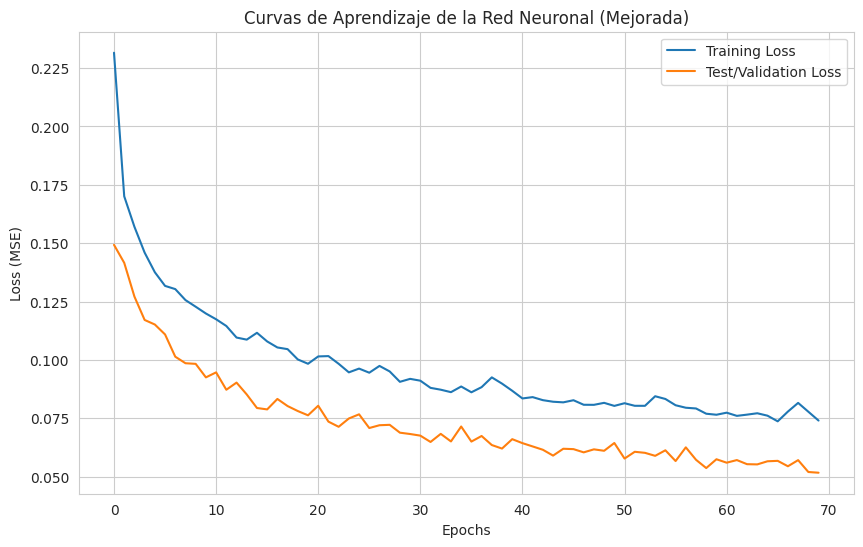

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test/Validation Loss')
plt.title('Curvas de Aprendizaje de la Red Neuronal (Mejorada)')
plt.xlabel('Epochs'); plt.ylabel('Loss (MSE)'); plt.legend()
plt.show()

### Resultados

--- Resultados para XGBoost ---


R2        RMSE         MAE
total load actual           0.994647  332.788556  234.235698
price actual_log            0.842566    0.109742    0.078342
total_renewable_generation  0.992403  353.049847  254.071477

--- Resultados para Red Neuronal (PyTorch) ---


R2        RMSE         MAE
total load actual           0.989281  470.921086  359.471322
price actual_log            0.869651    0.099857    0.071254
total_renewable_generation  0.988250  439.080289  320.588631


--- Comparativa de Tiempos de Entrenamiento ---


Modelo  Tiempo de Entrenamiento (s)
0                 XGBoost                     2.069656
1  Red Neuronal (PyTorch)                    29.672839

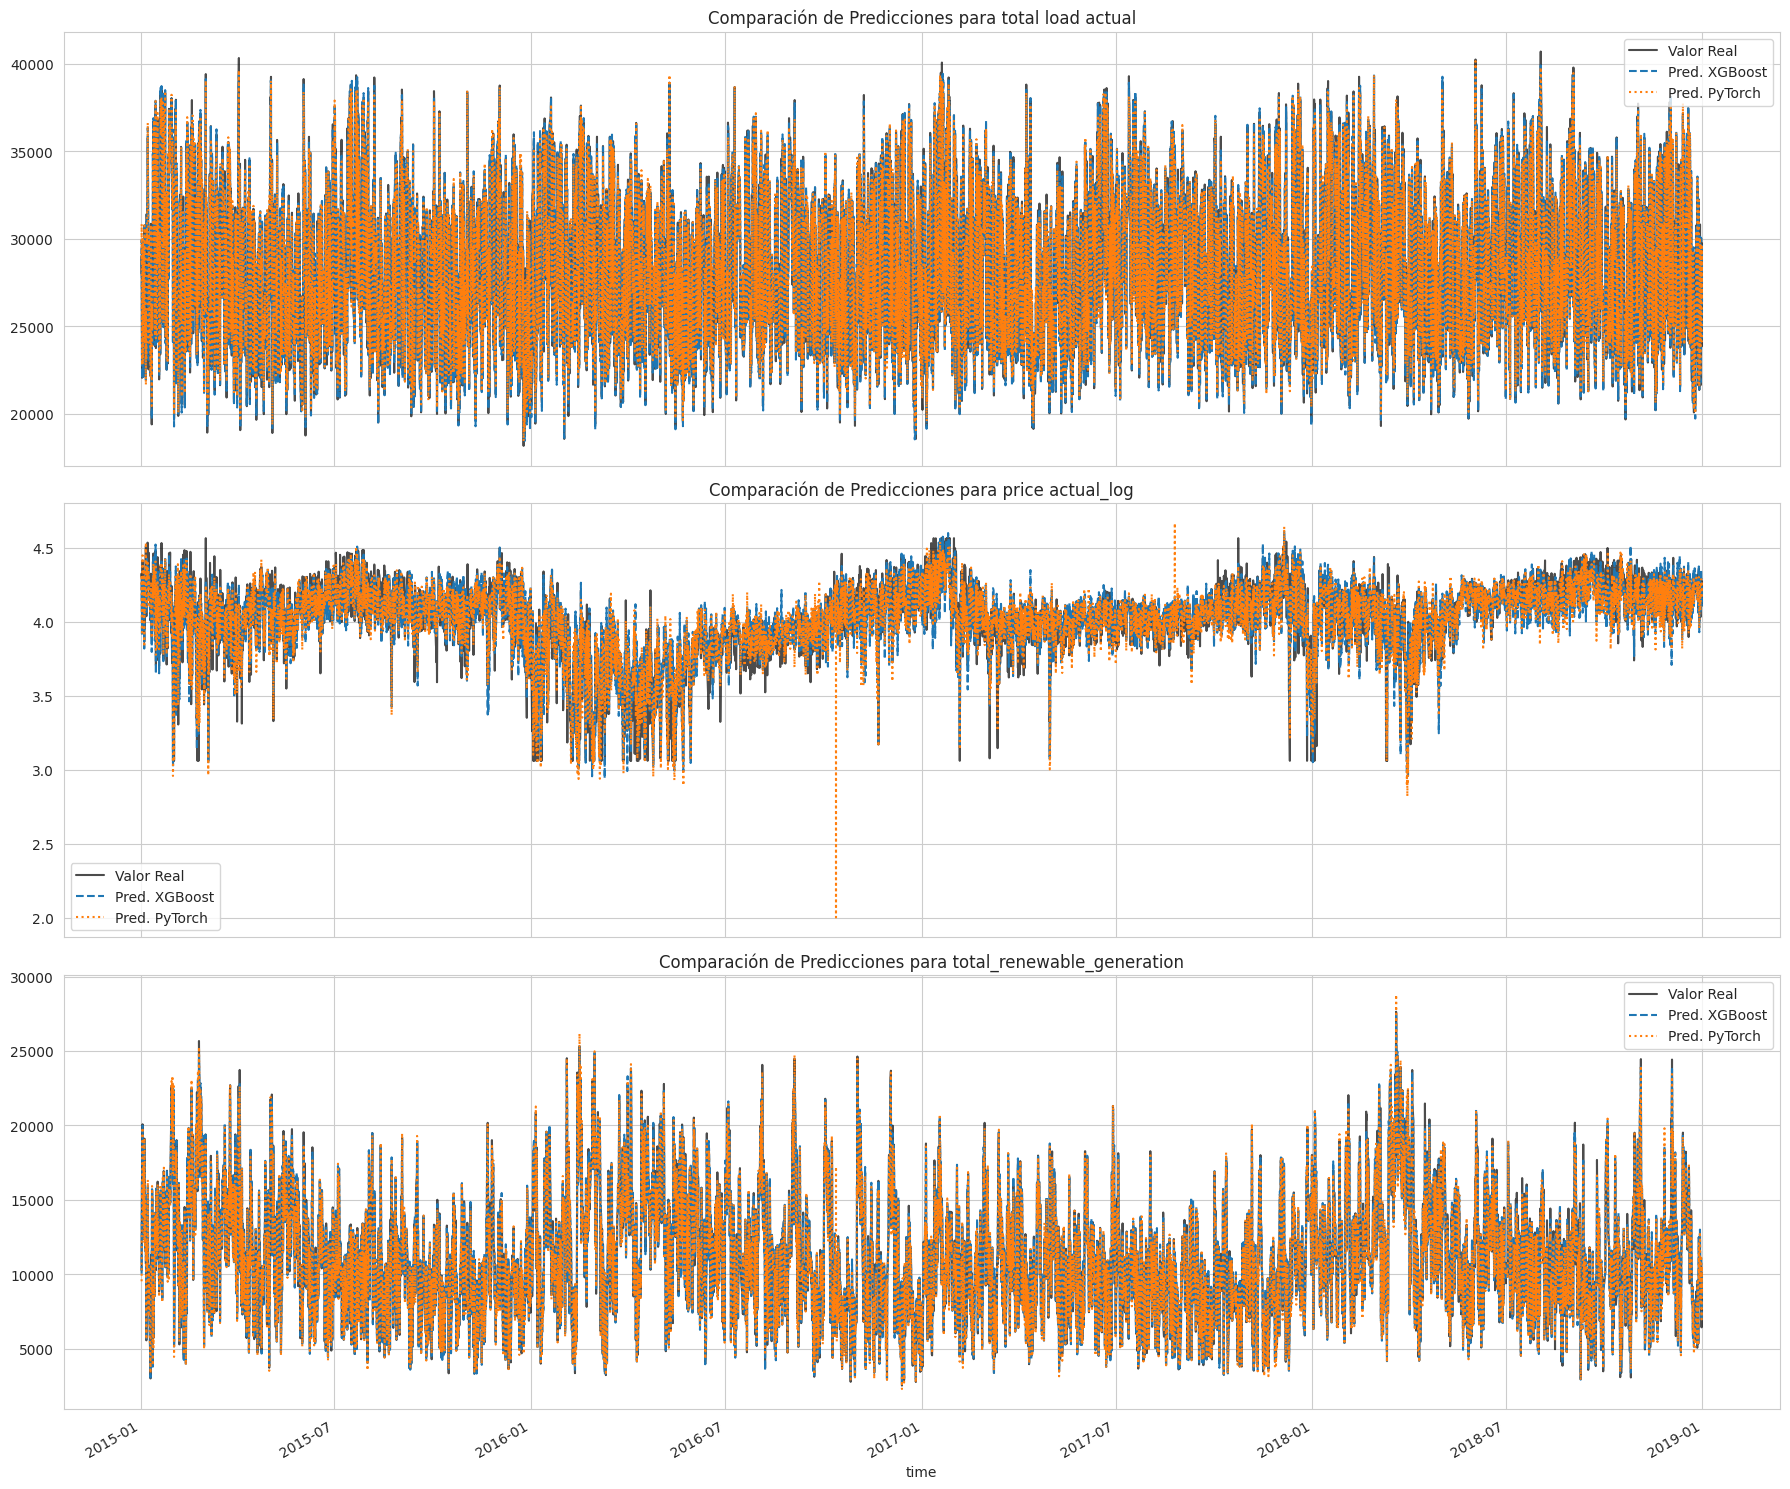

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_xgb = xgb_pipeline.predict(X_test)

model.eval()
with torch.no_grad():
    y_pred_nn = y_scaler.inverse_transform(model(torch.tensor(X_test_nn, dtype=torch.float32)).numpy())

def evaluate_model(y_true, y_pred, model_name):
    results = {
        target: {
            'R2': r2_score(y_true[target], y_pred[:, i]),
            'RMSE': np.sqrt(mean_squared_error(y_true[target], y_pred[:, i])),
            'MAE': mean_absolute_error(y_true[target], y_pred[:, i])
        }
        for i, target in enumerate(y_true.columns)
    }
    df_results = pd.DataFrame(results).T
    print(f"--- Resultados para {model_name} ---")
    display(df_results)
    return df_results

results_xgb = evaluate_model(y_test, y_pred_xgb, 'XGBoost')
results_nn = evaluate_model(y_test, y_pred_nn, 'Red Neuronal (PyTorch)')

print("\n--- Comparativa de Tiempos de Entrenamiento ---")
training_times_data = {
    'Modelo': ['XGBoost', 'Red Neuronal (PyTorch)'],
    'Tiempo de Entrenamiento (s)': [training_time_xgb, training_time_nn]
}
df_training_times = pd.DataFrame(training_times_data)
display(df_training_times)

y_pred_xgb_df = pd.DataFrame(y_pred_xgb, columns=y_test.columns, index=y_test.index)
y_pred_nn_df = pd.DataFrame(y_pred_nn, columns=y_test.columns, index=y_test.index)

fig, axes = plt.subplots(len(y_test.columns), 1, figsize=(18, 15), sharex=True)
for i, target in enumerate(y_test.columns):
    y_test[target].plot(ax=axes[i], label='Valor Real', color='black', alpha=0.7)
    y_pred_xgb_df[target].plot(ax=axes[i], label='Pred. XGBoost', linestyle='--')
    y_pred_nn_df[target].plot(ax=axes[i], label='Pred. PyTorch', linestyle=':')
    axes[i].set_title(f'Comparación de Predicciones para {target}')
    axes[i].legend()
plt.tight_layout()
plt.show()


### Conclusiones de los modelos

Ambos modelos tienen un rendimiento excepcional para nuestro propósito. No obstante para un uso general el que mejor predice nuestras variables es XGBoost y tiene menos RMSE y MAE, a parte, el coste de su entrenamiento sería mucho menor que el de la Red Neuronal.

Si usásemos para casos específicos:
- XGBoost: total load actual y total_renewable_geneartion
- Red Neuronal: price actual
